# Business Understanding

The company is expanding into the shipping industry, necessitating purchasing and operating airplanes for shipping cargo purposes.  The company is unfamiliar with the potential risks of different types of aircraft, so here we are looking to determine which aircraft present the lowest risk in order to begin the new shipping endeavor.

# Data Understanding

Here we are working with a dataset provided by the National Transportation Safety Board which includes aviation accident data from 1962 through 2003 about civil aviation accidents and selected incidents in the United States and international waters.  Every incident has a unique event ID, and the data files provide the dates and types of each event, as well as other pertinent safety information (e.g. aircraft make and model, number of injuries).

In [72]:
import pandas as pd
import numpy as np

In [73]:
data = pd.read_csv('./data/Aviation_Data.csv', low_memory=False)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [75]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [76]:
data['Event Date'] = pd.to_datetime(data['Event.Date'])
data['Event Date'].describe()

<ipython-input-76-ab274c447368>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Event Date'].describe()


count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Event Date, dtype: object

In [77]:
data['Make'].value_counts()

Cessna                            22227
Piper                             12029
CESSNA                             4922
Beech                              4330
PIPER                              2841
                                  ...  
Dryer                                 1
Mcnicholas                            1
Snodgrass                             1
Jennings                              1
SCHEMPP-HIRTH FLUGZEUGBAU GMBH        1
Name: Make, Length: 8237, dtype: int64

In [78]:
data['Model'].value_counts()

152                2367
172                1756
172N               1164
PA-28-140           932
150                 829
                   ... 
HP-14 SAILPLANE       1
18 [C-45H]            1
D140                  1
PITTS S 1S            1
680 F                 1
Name: Model, Length: 12318, dtype: int64

In [79]:
data['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(21)         1
Fatal(68)         1
Fatal(37)         1
Fatal(121)        1
Fatal(189)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [80]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [81]:
data['Investigation.Type'].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
11-02-2021        1
05-08-2022        1
05-01-2021        1
11-12-2020        1
03-11-2020        1
Name: Investigation.Type, Length: 71, dtype: int64

In [82]:
data['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [83]:
data['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [84]:
data['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [85]:
data['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [86]:
data['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                       61754
Foreign                                                                                                                                                                                                                                                                                               1999
<br /><br />                                                                                                                                                                                                                                                                                           167
Factual                                                                                                

In [87]:
data['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [88]:
data['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [89]:
data['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [90]:
data['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [91]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

The dataset includes records from 1982 through 2002.  It includes a wide variety of aircraft types, makes and models.  Most injuries are non-fatal.  While some aircraft have 2+ engines, a significant majority have only one engine.  Exploring all data to help determine its relevance to the business problem.

## Data Preparation

I make the data easier to work with by dropping unnecessary columns which contain irrelevant information, as well as records/rows relating to obviously irrelevant incidents (ie. since we are interested in the safest airplanes only, we are removing ameteur built aircraft as well as things like helicopters, parachutes, etc.)

In [92]:
data.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Broad.phase.of.flight'], inplace=True)

In [93]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
0,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,1948-10-24
1,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,1962-07-19
2,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,1974-08-30
3,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,1977-06-19
4,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,1979-08-02


In [94]:
data.drop(data[data['Amateur.Built'] == 'Yes'].index, inplace=True)

In [95]:
data.drop(data[data['Purpose.of.flight'] == 'Personal'].index, inplace=True)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39866 entries, 5 to 90344
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              38407 non-null  object        
 1   Injury.Severity         37424 non-null  object        
 2   Aircraft.damage         35580 non-null  object        
 3   Aircraft.Category       14122 non-null  object        
 4   Make                    38361 non-null  object        
 5   Model                   38343 non-null  object        
 6   Amateur.Built           38325 non-null  object        
 7   Number.of.Engines       33935 non-null  float64       
 8   Engine.Type             33589 non-null  object        
 9   FAR.Description         13831 non-null  object        
 10  Purpose.of.flight       32271 non-null  object        
 11  Total.Fatal.Injuries    33365 non-null  float64       
 12  Total.Serious.Injuries  32970 non-null  float6

In [97]:
data.drop(columns = ['FAR.Description', 'Event Date'], inplace=True)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39866 entries, 5 to 90344
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              38407 non-null  object 
 1   Injury.Severity         37424 non-null  object 
 2   Aircraft.damage         35580 non-null  object 
 3   Aircraft.Category       14122 non-null  object 
 4   Make                    38361 non-null  object 
 5   Model                   38343 non-null  object 
 6   Amateur.Built           38325 non-null  object 
 7   Number.of.Engines       33935 non-null  float64
 8   Engine.Type             33589 non-null  object 
 9   Purpose.of.flight       32271 non-null  object 
 10  Total.Fatal.Injuries    33365 non-null  float64
 11  Total.Serious.Injuries  32970 non-null  float64
 12  Total.Minor.Injuries    33142 non-null  float64
 13  Total.Uninjured         36070 non-null  float64
 14  Weather.Condition       34484 non-null

In [99]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
20,1982-01-02,Non-Fatal,Substantial,Airplane,Cessna,152,No,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC
22,1982-01-02,Non-Fatal,Substantial,Helicopter,Bell,206L-1,No,1.0,Turbo Shaft,Unknown,0.0,0.0,0.0,1.0,VMC
25,1982-01-03,Fatal(8),Destroyed,Airplane,Cessna,414A,No,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC


In [100]:
values_to_remove = ['Helicopter', 'Glider', 'Balloon', 'Gyrocraft', 'Weight-Shift', 'Powered Parachute', 'Ultralight', 'Unknown', 'WSFT', 'Powered-Lift', 'Blimp', 'UNK', 'Rocket', 'ULTR' ]
data = data[~data['Aircraft.Category'].isin(values_to_remove)]

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36836 entries, 5 to 90344
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              35377 non-null  object 
 1   Injury.Severity         34464 non-null  object 
 2   Aircraft.damage         32679 non-null  object 
 3   Aircraft.Category       11092 non-null  object 
 4   Make                    35332 non-null  object 
 5   Model                   35313 non-null  object 
 6   Amateur.Built           35297 non-null  object 
 7   Number.of.Engines       31481 non-null  float64
 8   Engine.Type             31404 non-null  object 
 9   Purpose.of.flight       29941 non-null  object 
 10  Total.Fatal.Injuries    30659 non-null  float64
 11  Total.Serious.Injuries  30248 non-null  float64
 12  Total.Minor.Injuries    30390 non-null  float64
 13  Total.Uninjured         33156 non-null  float64
 14  Weather.Condition       32007 non-null

In [102]:
data.drop(columns = ['Aircraft.Category'], inplace=True)

In [103]:
data.drop(columns = ['Amateur.Built'], inplace=True)

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36836 entries, 5 to 90344
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              35377 non-null  object 
 1   Injury.Severity         34464 non-null  object 
 2   Aircraft.damage         32679 non-null  object 
 3   Make                    35332 non-null  object 
 4   Model                   35313 non-null  object 
 5   Number.of.Engines       31481 non-null  float64
 6   Engine.Type             31404 non-null  object 
 7   Purpose.of.flight       29941 non-null  object 
 8   Total.Fatal.Injuries    30659 non-null  float64
 9   Total.Serious.Injuries  30248 non-null  float64
 10  Total.Minor.Injuries    30390 non-null  float64
 11  Total.Uninjured         33156 non-null  float64
 12  Weather.Condition       32007 non-null  object 
dtypes: float64(5), object(8)
memory usage: 3.9+ MB


In [105]:
data.head()

,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
5,1979-09-17,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC
8,1982-01-01,Non-Fatal,Substantial,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
20,1982-01-02,Non-Fatal,Substantial,Cessna,152,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC
25,1982-01-03,Fatal(8),Destroyed,Cessna,414A,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC
31,1982-01-03,Non-Fatal,Substantial,Air Tractor,AT-301,1.0,Reciprocating,Ferry,0.0,0.0,0.0,1.0,VMC


In [106]:
data.drop(columns = ['Aircraft.damage'], inplace = True)

In [107]:
data.head()

,Event.Date,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
5,1979-09-17,Non-Fatal,Mcdonnell Douglas,DC9,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC
8,1982-01-01,Non-Fatal,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
20,1982-01-02,Non-Fatal,Cessna,152,1.0,Reciprocating,Instructional,0.0,0.0,0.0,1.0,VMC
25,1982-01-03,Fatal(8),Cessna,414A,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC
31,1982-01-03,Non-Fatal,Air Tractor,AT-301,1.0,Reciprocating,Ferry,0.0,0.0,0.0,1.0,VMC


# Exploratory Data Analysis

In [192]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [193]:
data['Number.of.Engines'].value_counts()

1.0    18241
2.0     4905
3.0      382
4.0      263
Name: Number.of.Engines, dtype: int64

In [194]:
data = data[data['Number.of.Engines'] != 0.0]

In [195]:
data = data[data['Number.of.Engines'] != 6.0]

In [196]:
data = data[data['Number.of.Engines'] != 8.0]

In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23791 entries, 8 to 90022
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              23791 non-null  object 
 1   Injury.Severity         23791 non-null  object 
 2   Make                    23791 non-null  object 
 3   Model                   23791 non-null  object 
 4   Number.of.Engines       23791 non-null  float64
 5   Engine.Type             23791 non-null  object 
 6   Purpose.of.flight       23791 non-null  object 
 7   Total.Fatal.Injuries    23791 non-null  float64
 8   Total.Serious.Injuries  23791 non-null  float64
 9   Total.Minor.Injuries    23791 non-null  float64
 10  Total.Uninjured         23791 non-null  float64
 11  Weather.Condition       23791 non-null  object 
dtypes: float64(5), object(7)
memory usage: 2.4+ MB


In [198]:
data['Number.of.Engines'].value_counts()

1.0    18241
2.0     4905
3.0      382
4.0      263
Name: Number.of.Engines, dtype: int64

In [199]:
data['Total.Fatal.Injuries'].value_counts()

0.0      20117
1.0       1897
2.0       1007
3.0        358
4.0        189
5.0         61
6.0         50
8.0         24
7.0         21
10.0         7
9.0          7
14.0         5
11.0         3
25.0         3
29.0         2
70.0         2
12.0         2
15.0         2
13.0         2
18.0         2
34.0         2
17.0         2
23.0         2
256.0        1
82.0         1
153.0        1
43.0         1
111.0        1
73.0         1
28.0         1
270.0        1
144.0        1
230.0        1
131.0        1
27.0         1
156.0        1
78.0         1
68.0         1
88.0         1
20.0         1
132.0        1
174.0        1
31.0         1
30.0         1
37.0         1
135.0        1
110.0        1
Name: Total.Fatal.Injuries, dtype: int64

In [200]:
data.dropna(inplace = True)

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23791 entries, 8 to 90022
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              23791 non-null  object 
 1   Injury.Severity         23791 non-null  object 
 2   Make                    23791 non-null  object 
 3   Model                   23791 non-null  object 
 4   Number.of.Engines       23791 non-null  float64
 5   Engine.Type             23791 non-null  object 
 6   Purpose.of.flight       23791 non-null  object 
 7   Total.Fatal.Injuries    23791 non-null  float64
 8   Total.Serious.Injuries  23791 non-null  float64
 9   Total.Minor.Injuries    23791 non-null  float64
 10  Total.Uninjured         23791 non-null  float64
 11  Weather.Condition       23791 non-null  object 
dtypes: float64(5), object(7)
memory usage: 2.4+ MB


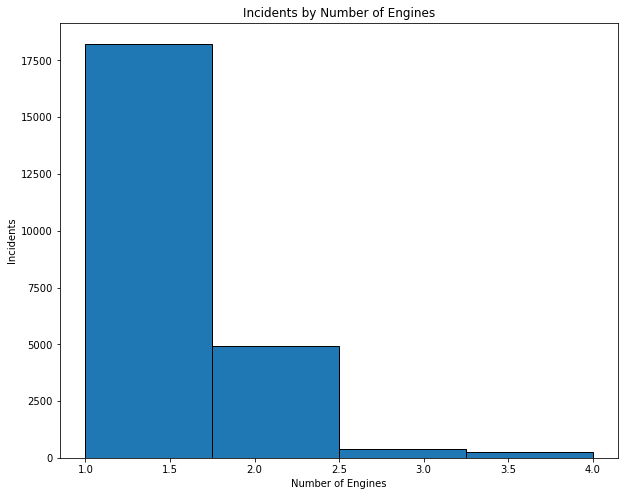

In [202]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(data['Number.of.Engines'], bins=4, edgecolor='black')
ax.set_xlabel("Number of Engines")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Number of Engines")
plt.show()

In [203]:
data['Engine.Type'].value_counts()

Reciprocating    18661
Turbo Prop        1976
Turbo Shaft       1553
Turbo Fan         1183
Turbo Jet          418
Name: Engine.Type, dtype: int64

In [204]:
data.drop(data[data['Engine.Type'] == 'Unknown'].index, inplace=True)

In [205]:
data.drop(data[data['Engine.Type'] == 'Electric'].index, inplace=True)

In [206]:
data.drop(data[data['Engine.Type'] == 'UNK'].index, inplace=True)

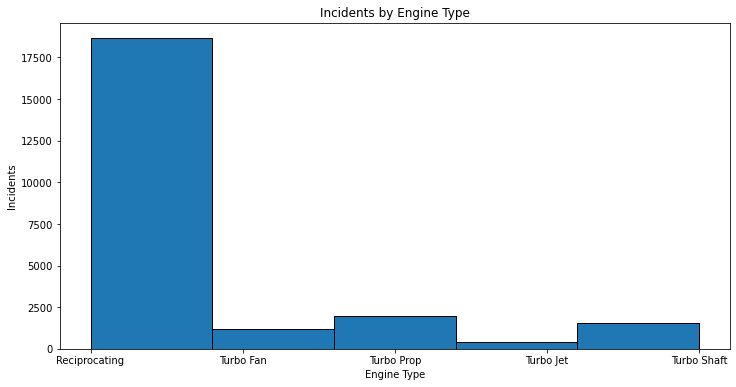

In [207]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(data['Engine.Type'], bins=5, edgecolor='black')
ax.set_xlabel("Engine Type")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Engine Type")
plt.show()

In [217]:
safest_aircraft = data[data['Number.of.Engines'] != 1.0]

In [218]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5550 entries, 8 to 89576
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              5550 non-null   object 
 1   Injury.Severity         5550 non-null   object 
 2   Make                    5550 non-null   object 
 3   Model                   5550 non-null   object 
 4   Number.of.Engines       5550 non-null   float64
 5   Engine.Type             5550 non-null   object 
 6   Purpose.of.flight       5550 non-null   object 
 7   Total.Fatal.Injuries    5550 non-null   float64
 8   Total.Serious.Injuries  5550 non-null   float64
 9   Total.Minor.Injuries    5550 non-null   float64
 10  Total.Uninjured         5550 non-null   float64
 11  Weather.Condition       5550 non-null   object 
dtypes: float64(5), object(7)
memory usage: 563.7+ KB


In [219]:
safest_aircraft['Make'].value_counts()

Cessna                          848
Beech                           837
Piper                           802
Boeing                          651
Mcdonnell Douglas               246
                               ... 
Short                             1
Aerospace Tech. Of Australia      1
Martin                            1
Rockwell International            1
Erickson Air-crane, Inc.          1
Name: Make, Length: 195, dtype: int64

In [220]:
safest_aircraft = safest_aircraft[safest_aircraft['Engine.Type'] != 'Reciprocating']

In [236]:
safest_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914 entries, 79 to 89576
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Date              2914 non-null   object 
 1   Injury.Severity         2914 non-null   object 
 2   Make                    2914 non-null   object 
 3   Model                   2914 non-null   object 
 4   Number.of.Engines       2914 non-null   float64
 5   Engine.Type             2914 non-null   object 
 6   Purpose.of.flight       2914 non-null   object 
 7   Total.Fatal.Injuries    2914 non-null   float64
 8   Total.Serious.Injuries  2914 non-null   float64
 9   Total.Minor.Injuries    2914 non-null   float64
 10  Total.Uninjured         2914 non-null   float64
 11  Weather.Condition       2914 non-null   object 
dtypes: float64(5), object(7)
memory usage: 296.0+ KB


In [232]:
safest_aircraft['Make'].value_counts()

Boeing                         648
Beech                          292
Mcdonnell Douglas              245
Cessna                         103
Swearingen                     103
                              ... 
Short                            1
Fairchild Hiller                 1
Gates Learjet Corporation        1
CANADAIR LTD                     1
GULFSTREAM AM CORP COMM DIV      1
Name: Make, Length: 146, dtype: int64

In [234]:
safest_aircraft['Purpose.of.flight'].value_counts()

Unknown                      1927
Business                      277
Executive/corporate           223
Positioning                   208
Instructional                  78
Ferry                          59
Public Aircraft                55
Other Work Use                 34
Flight Test                    19
Skydiving                      14
Public Aircraft - Federal       8
Aerial Observation              4
Aerial Application              3
Public Aircraft - Local         2
Firefighting                    2
Air Race show                   1
Name: Purpose.of.flight, dtype: int64

In [233]:
safest_aircraft.head()

,Event.Date,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
79,1982-01-12,Incident,Lockheed,L-1011,3.0,Turbo Fan,Unknown,0.0,0.0,0.0,149.0,UNK
80,1982-01-12,Incident,Embraer,EMB-110P1,2.0,Turbo Prop,Unknown,0.0,0.0,0.0,2.0,VMC
84,1982-01-13,Fatal(78),Boeing,737-222,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC
93,1982-01-15,Non-Fatal,Swearingen,SA 226-TC,2.0,Turbo Prop,Unknown,0.0,1.0,2.0,12.0,VMC
118,1982-01-19,Fatal(3),Swearingen,SA226-T(B),2.0,Turbo Prop,Executive/corporate,3.0,0.0,0.0,0.0,IMC


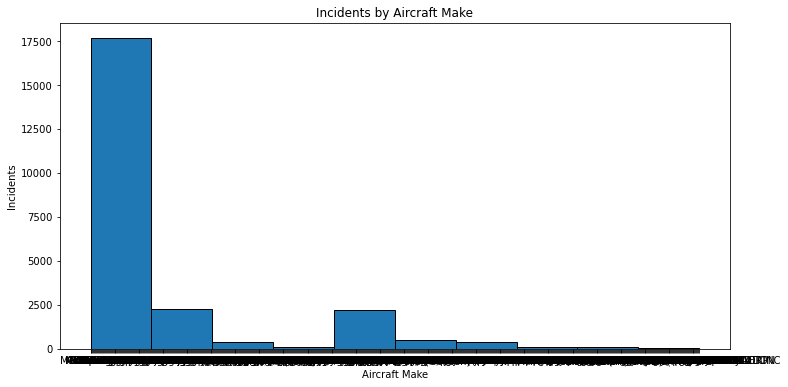

In [230]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(data['Make'], bins=10, edgecolor='black')
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Incidents")
ax.set_title("Incidents by Aircraft Make")
plt.show()

In [188]:
safest_aircraft.head()

,Event.Date,Injury.Severity,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
84,1982-01-13,Fatal(78),Boeing,737-222,2.0,Turbo Fan,Unknown,78.0,6.0,3.0,0.0,IMC
93,1982-01-15,Non-Fatal,Swearingen,SA 226-TC,2.0,Turbo Prop,Unknown,0.0,1.0,2.0,12.0,VMC
118,1982-01-19,Fatal(3),Swearingen,SA226-T(B),2.0,Turbo Prop,Executive/corporate,3.0,0.0,0.0,0.0,IMC
155,1982-01-23,Fatal(2),Mcdonnell Douglas,DC-10-30,3.0,Turbo Fan,Unknown,2.0,4.0,24.0,182.0,IMC
191,1982-01-29,Incident,Beech,B200,2.0,Turbo Prop,Executive/corporate,0.0,0.0,0.0,2.0,VMC


# Conclusions

1) Aircraft with multiple engines are more reliable.  Overwhelmingly, aircraft involved in incidents are single engine aircraft.
2) Turbo fan engines appear most reliable, though avoiding reciprocating engines seems most crucial when it comes to engine type.
3)

## Limitations

The dataset outlines incidents only and does not include information on the total number of aircraft or total flights, leaving room for more precision using a more complete dataset.

## Recommendations

## Next Steps

Evaluating cost and other variables will be crucial, such as ease of service and repair, as well as ability to modify for business purposes, since these considerations will factor into choosing aircraft to purchase.